# Nombre: Jose Carlos Camacho Salazar

# **Ejercicio:** Quinua Real

Gracias a su alto valor nutricional, la quinua ha sido reconocida como un superalimento de importancia mundial, especialmente después de que las Naciones Unidas proclamaran el año 2013 como el "Año Internacional de la Quinua". Entre sus variedades, la quinua real —originaria exclusivamente del altiplano boliviano— destaca por poseer las propiedades nutricionales más elevadas. No obstante, su producción enfrenta limitaciones debido a la ausencia de herramientas eficaces para separar la quinua de impurezas como paja, barro y piedras, lo que obliga a realizar este proceso manualmente y con gran esfuerzo [1].

En ese sentido, en este ejercicio deberas trabajar con el siguiente dataset https://drive.google.com/file/d/1M5skIXyLsJ4Ymg5cCQYEvEjJWNV0EKbv/view?usp=sharing y deberas programar funciones para realizar un analisís preliminar del dataset.

1. Crear un diccionario que contenga un registro por cada imagen/archivo en el dataset. El registro tendra que estar compuesto por ruta, categoría, alto, y ancho de la imagen. Para esto último, puede usar el atributo `.shape` disponible después de abrir una imagen con opencv.
2. Realizar un análisis sobre cuantas imagenes se tiene por categoría en el dataset.
3. Mostrar un ejemplo de imagen por cada categoría.
4. Generar un gráfico con la distribución de tamaños (alto y ancho de las imágenes). Hacer uso matplotlib.
5. Mostrar cual es la categoría que mas y menos se repiten.

[1] E. Salcedo, C. Huanca, and P. Patzi, “Enabling Efficient Royal Quinoa Quality Inspection via Mobile‑based Foreign Body Detection,” in 2024 IEEE Latin American Conference on Computational Intelligence (LA‑CCI 2024), 2024, doi:10.1109/LA‑CCI62337.2024.10814753.

In [1]:
# Importar dependencias

# La librería JSON permite abrir y guardar archivos en formato JSON
import json
# Sklearn cuenta con una herramienta para dividir un dataset
# en un subconjunto de entrenamiento y un subconjunto de evaluación
# Ambos, son importantes para el trabajo con aprendizaje automatico
from sklearn.model_selection import train_test_split
# os es una librería propia de Python que permite precesar archivos
import os
import gdown
# La librería TQDM permite integrar barras de progreso en estructuras repetitivas for
from tqdm.auto import tqdm
# La librería shutil tiene implementaciones optimizadas para trabajar con archivos
import shutil
# La librería random permite crear números aleatorios
import random
# La librería OpenCV contiene funciones y algoritmos para procesar imágenes y video
import cv2
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%cd /content

# ID del archivo
file_id = "1M5skIXyLsJ4Ymg5cCQYEvEjJWNV0EKbv"

# Comprobar si el conjunto de datos ya se ha descargado
if os.path.exists('./quinua'):
  !rm -rf quinua
os.makedirs('quinua')

# Ruta completa del archivo de salida
output = os.path.join("./quinua", "quinua_dataset.zip")

# Descargar el archivo
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet = False)

/content


Downloading...
From (original): https://drive.google.com/uc?id=1M5skIXyLsJ4Ymg5cCQYEvEjJWNV0EKbv
From (redirected): https://drive.google.com/uc?id=1M5skIXyLsJ4Ymg5cCQYEvEjJWNV0EKbv&confirm=t&uuid=fd17b859-7da2-4445-9c2b-df43433c562f
To: /content/quinua/quinua_dataset.zip
100%|██████████| 28.1M/28.1M [00:00<00:00, 58.3MB/s]


'./quinua/quinua_dataset.zip'

In [3]:
# Descomprimir dataset
!unzip -qn '/content/quinua/quinua_dataset.zip' -d /content/quinua
!rm /content/quinua/quinua_dataset.zip

In [19]:
base_path  = '/content/quinua/dataset'

# Diccionario de imágenes
image_data = []

for category in os.listdir(base_path):
    category_path = os.path.join(base_path, category)
    if os.path.isdir(category_path):
        for image_name in os.listdir(category_path):
            image_path = os.path.join(category_path, image_name)
            img = cv2.imread(image_path)
            if img is not None:
                height, width = img.shape[:2]
                image_data.append({
                    "ruta": image_path,
                    "categoría": category,
                    "alto": height,
                    "ancho": width
                })



In [13]:
# Convertir a DataFrame
df = pd.DataFrame(image_data)
# Muestra los 10 Primeros elementos del DataSet
display(df.head(10))

,ruta,categoría,alto,ancho
0,/content/quinua/dataset/clod/881.jpg,clod,227,227
1,/content/quinua/dataset/clod/759.jpg,clod,227,227
2,/content/quinua/dataset/clod/794.jpg,clod,227,227
3,/content/quinua/dataset/clod/685.jpg,clod,227,227
4,/content/quinua/dataset/clod/385.jpg,clod,227,227
5,/content/quinua/dataset/clod/831.jpg,clod,227,227
6,/content/quinua/dataset/clod/350.jpg,clod,227,227
7,/content/quinua/dataset/clod/87.jpg,clod,227,227
8,/content/quinua/dataset/clod/6.jpg,clod,227,227
9,/content/quinua/dataset/clod/162.jpg,clod,227,227


In [17]:
# Conteo por categoría
conteo = df['categoría'].value_counts()
print("Número de imágenes por categoría:")
print(conteo)

Número de imágenes por categoría:
categoría
stem     1000
good      756
red       628
clod      594
stone     592
dark      396
Name: count, dtype: int64


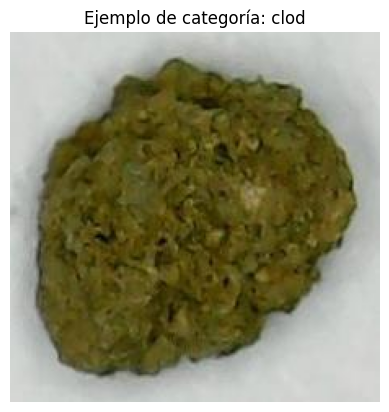

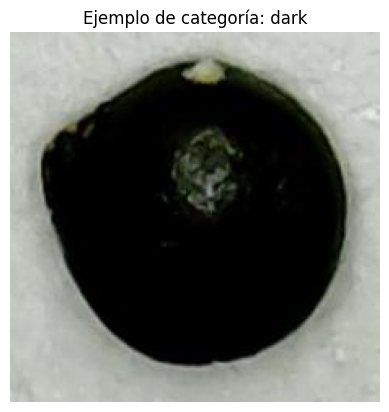

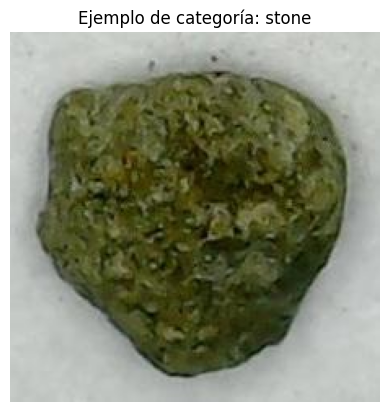

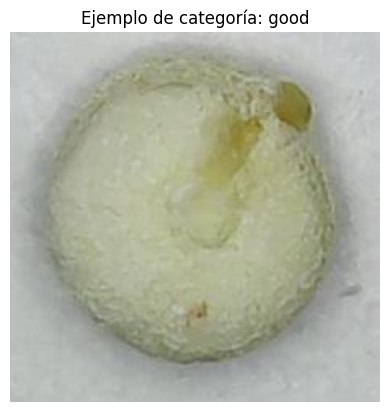

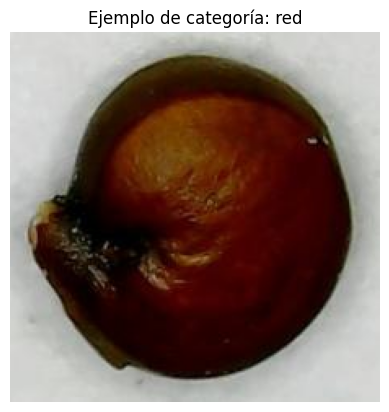

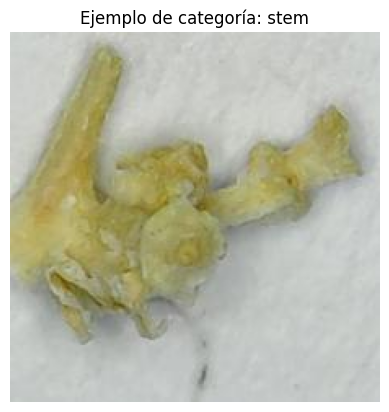

In [23]:
#Mostrar una imagen por categoria
for categoria in df['categoría'].unique():
    ejemplo = df[df['categoría'] == categoria].iloc[0]
    img = cv2.imread(ejemplo['ruta'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Ejemplo de categoría: {categoria}")
    plt.axis('off')
    plt.show()


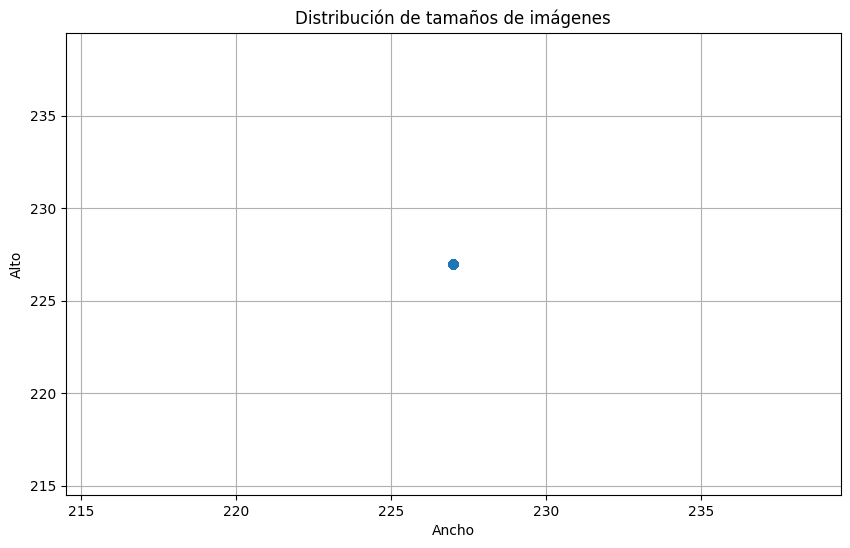

In [6]:
# Mostrar grafico de tamaño de imagenes
plt.figure(figsize=(10, 6))
plt.scatter(df['ancho'], df['alto'], alpha=0.5)
plt.xlabel('Ancho')
plt.ylabel('Alto')
plt.title('Distribución de tamaños de imágenes')
plt.grid(True)
plt.show()


In [7]:
# Mostrar la categoria con mas y menos imagenes
categoria_mas = conteo.idxmax()
categoria_menos = conteo.idxmin()

print(f"Categoría con más imágenes: {categoria_mas} ({conteo.max()} imágenes)")
print(f"Categoría con menos imágenes: {categoria_menos} ({conteo.min()} imágenes)")


Categoría con más imágenes: stem (1000 imágenes)
Categoría con menos imágenes: dark (396 imágenes)
